<a href="https://mybinder.org/v2/gh/HuygensING/hyper-collate/develop?filepath=hyper-collate-jupyter%2Fhyper-collate-readme.ipynb" target="_blank"><img src="https://mybinder.org/badge_logo.svg"/></a>
# Using HyperCollate in Kotlin Notebooks: 

## Dependencies

Follow these steps to set up your jupyter for using hyper-collate:

- install [Graphviz](https://graphviz.org/download/)  for the graph rendering.
- install the library descriptor hyper-collate.json from https://raw.githubusercontent.com/HuygensING/hyper-collate/develop/jupyter/hyper-collate.json in <UserHome>/.jupyter_kotlin/libraries (you might have to `mkdir` this directory first.)
- set up the necessary dependencies using the line magic
  `%use hyper-collate`

In [1]:
%use hyper-collate

Welcome to HyperCollate 1.3.5-SNAPSHOT-2
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



After this, you're ready to use HyperCollate:

## Import witnesses

There are 2 ways to import the XML of the witnesses you want to collate:

- Inline string:


In [2]:
val wA = HC.importXMLWitness("A", "<text>The dog's big eyes.</text>")
val wB = HC.importXMLWitness("B", "<text>The dog's <del>big black ears</del><add>brown eyes</add>.</text>")

 - From a File:

In [3]:
import java.io.File
val wC = HC.importXMLWitness("C",File("c.xml"))

The witnesses can be visualized as a graph using `.show()`

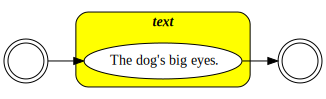

In [4]:
wA.show()

The `.show()` for witness graphs has several options:

 - colored : will use different colors for the different markup nodes (default: true)
 
 turning it off will produce a simpler graph:

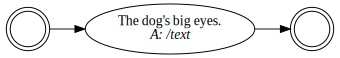

In [5]:
wA.show(colored=false)

 - join: will minimize the amount of nodes in the graph by joining tokens where possible. (default: true)
 
   Turn it off to see the individual tokens:

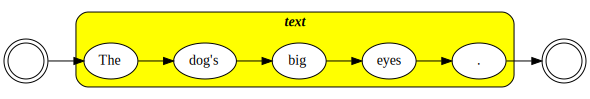

In [6]:
wA.show(join=false)

 - emphasizeWhitespace: visualize whitespace in the tokens (default: false)

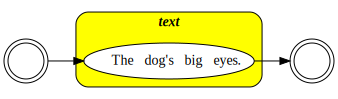

In [7]:
wA.show(emphasizeWhitespace=true)

## Collating the witnesses

In [8]:
val collationGraph = HC.collate(wA,wB,wC)

The collationGraph can be visualized as an ASCII table:

In [9]:
collationGraph.asASCIITable()

┌───┬────┬──────┬──────┬───────────┬──────────┬────────┬─┐
│[A]│The │      │dog's │big        │eyes      │        │.│
├───┼────┼──────┼──────┼───────────┼──────────┼────────┼─┤
│[B]│    │      │      │[+]   brown│[+]   eyes│        │ │
│   │The │      │dog's │[-] big    │[-] black │[-] ears│.│
├───┼────┼──────┼──────┼───────────┼──────────┼────────┼─┤
│[C]│    │      │      │[+]   brown│          │        │ │
│   │The │black │dog's │[-] floppy │[+] eyes  │[-] ears│.│
└───┴────┴──────┴──────┴───────────┴──────────┴────────┴─┘

As an HTML table:

In [10]:
collationGraph.asHtml()

A,The,,dog's,big,eyes,,.
B,The,,dog's,big brown,black eyes,ears,.
C,The,black,dog's,floppy brown,eyes,ears,.


Or as a set of nodes and edges:

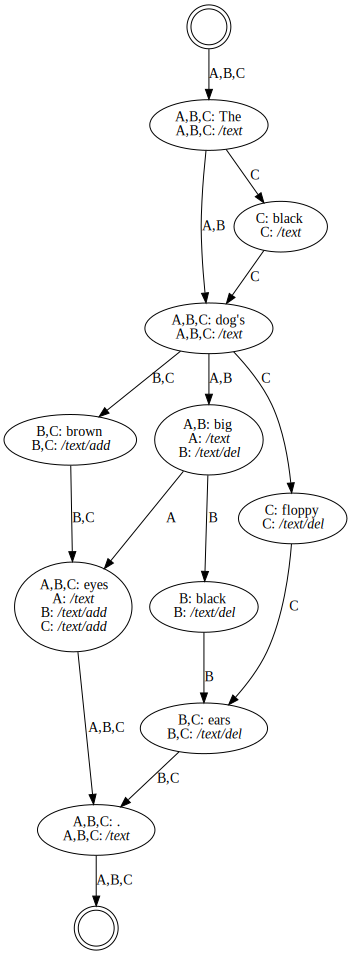

In [11]:
collationGraph.show()

This `.show()` also has the `join` and `emphasizeWhitespace` options mentioned above.